In [14]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pylab as plt
import matplotlib.image as mpimg
import zipfile
import os
import zlib


%matplotlib inline

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
ls


 Volume in drive C has no label.
 Volume Serial Number is 588D-4BF9

 Directory of C:\Users\benia\Desktop\Machine_Learning\Korona wyzwaä\Challenge 2

28.02.2020  16:12    <DIR>          .
28.02.2020  16:12    <DIR>          ..
28.02.2020  14:44    <DIR>          .ipynb_checkpoints
28.02.2020  14:42           269˙129 Cifar -Day4.ipynb
28.02.2020  15:53    <DIR>          data
28.02.2020  16:12         1˙434˙817 Day 5.ipynb
26.02.2020  11:32            69˙555 imagenet - Day2.ipynb
26.02.2020  13:20            89˙395 Mnist - Day 3.ipynb
               4 File(s)      1˙862˙896 bytes
               4 Dir(s)  38˙368˙935˙936 bytes free


In [4]:
cd data

C:\Users\benia\Desktop\Machine_Learning\Korona wyzwań\Challenge 2\data


In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 588D-4BF9

 Directory of C:\Users\benia\Desktop\Machine_Learning\Korona wyzwaä\Challenge 2\data

28.02.2020  15:53    <DIR>          .
28.02.2020  15:53    <DIR>          ..
28.02.2020  15:53    <DIR>          cats_and_dogs_filtered
               0 File(s)              0 bytes
               3 Dir(s)  38˙368˙935˙936 bytes free


In [6]:
base_dir = 'cats_and_dogs_filtered' 

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dog_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [7]:
def plt_images(item_dir, top=25):  
  all_item_dirs = os.listdir( item_dir )
  item_files = [os.path.join(item_dir,file) for file in all_item_dirs ][:top]
  plt.figure(figsize=(10,10))
  for idx, img_path in enumerate(item_files):
    plt.subplot(5,5,idx+1)
    img = mpimg.imread(img_path)
    plt.imshow(img)
  plt.tight_layout()

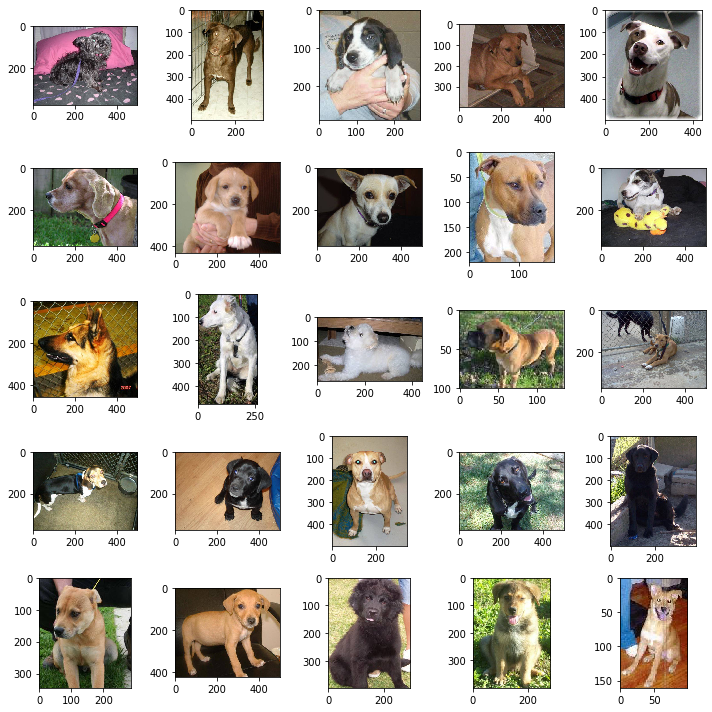

In [8]:
plt_images(train_dog_dir)

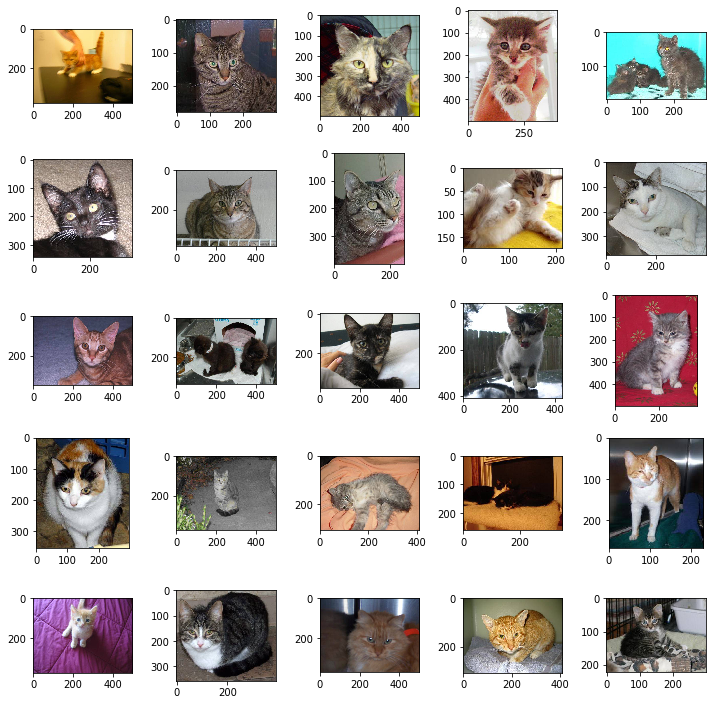

In [9]:
plt_images(train_cats_dir)

In [10]:
input_shape=(150,150,3)
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape),
    MaxPool2D(pool_size=(2,2)),
    
             
    Conv2D(filters=64, kernel_size=(3,3)),
    MaxPool2D(pool_size=(2,2)),



    Conv2D(filters=128, kernel_size=(3,3)),
    MaxPool2D(pool_size=(2,2)),


    Conv2D(filters=256, kernel_size=(3,3)),
    MaxPool2D(pool_size=(2,2)),


    Flatten(),
    

    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
    
              
             ])
#model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=2, 
  
    validation_data=validation_generator,
    validation_steps=30,
    verbose=2,
    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 50 steps, validate for 30 steps
Epoch 1/2
50/50 [==============================] - 64s 1s/step - loss: 0.6851 - accuracy: 0.5650 - val_loss: 0.6751 - val_accuracy: 0.5583
Epoch 2/2
50/50 [==============================] - 47s 940ms/step - loss: 0.6947 - accuracy: 0.5740 - val_loss: 0.6534 - val_accuracy: 0.6200
